# Task 1: Exploratory Data Analytics
## Data Collection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer()
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

Unique classes: ['entertainment' 'tech']


## Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [2]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])
print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}\nNumber of features: {word_bank.size}\n\n")


Number of articles:  428
Number of features:  13518
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' '

Printed above are the total number of articles, 428; the total number of features (distinct words), 13,518; and the features for the first five articles, as well as the number of features.

## Task 1 B
#### i) Top 50 Frequency plot

The code below shows the 50 most frequent words in our dataset.
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. mobile: 291
17. time: 271
18. show: 271
19. many: 259
20. number: 257
21. make: 253
22. technology: 250
23. tv: 246
24. use: 241
25. like: 239
26. million: 229
27. world: 222
28. digital: 221
29. last: 220
30. two: 217
31. games: 216
32. net: 216
33. users: 214
34. software: 213
35. years: 212
36. phone: 200
37. get: 198
38. top: 195
39. bbc: 189
40. used: 183
41. service: 180
42. computer: 180
43. 000: 179
44. way: 178
45. three: 173
46. well: 172
47. made: 169
48. online: 163
49. 2004: 161
50. game: 161

This list will be used to generate the plot for b ii)

[10567  8917  8257   859  8516  4899 13459  8108 12829  8069 13402  1610
  3158  4962 12634  7939 11013 12285  7552  8399  7494 12090 12603 12835
  7236  7856 13386  3748  7060 12616  8234  5317 12841 11254 13463  9010
  5432 12352  1496 12836  2879 10876     1 13153 12238 13211  7459  8523
  5309   193]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. also: 479
5. one: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. mobile: 291
17. show: 271
18. time: 271
19. many: 259
20. number: 257
21. make: 253
22. technology: 250
23. tv: 246
24. use: 241
25. like: 239
26. million: 229
27. world: 222
28. digital: 221
29. last: 220
30. two: 217
31. net: 216
32. games: 216
33. users: 214
34. software: 213
35. years: 212
36. phone: 200
37. get: 198
38. top: 195
39. bbc: 189
40. used: 183
41. computer: 180
42. service: 180
43. 000: 179
44. way: 178
45. three: 173
46. well: 172
47. made: 169
4

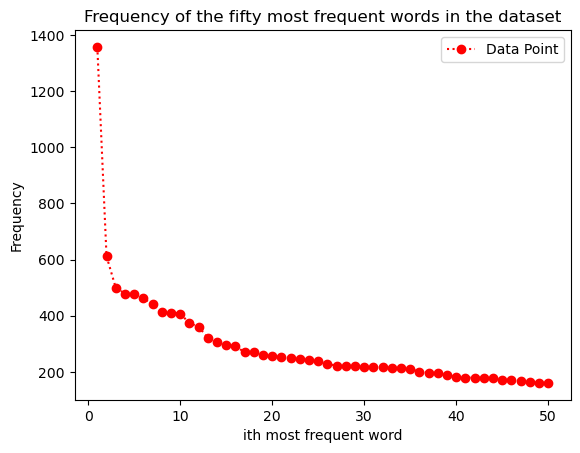

In [3]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

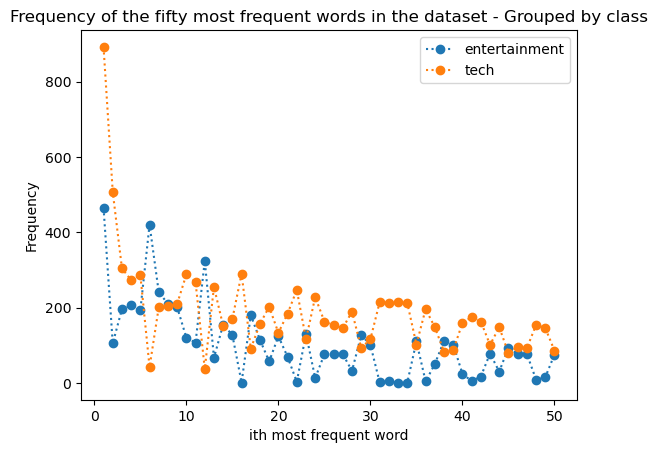

In [4]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

Number of tech articles: 216 
Number of entertainment articles: 212


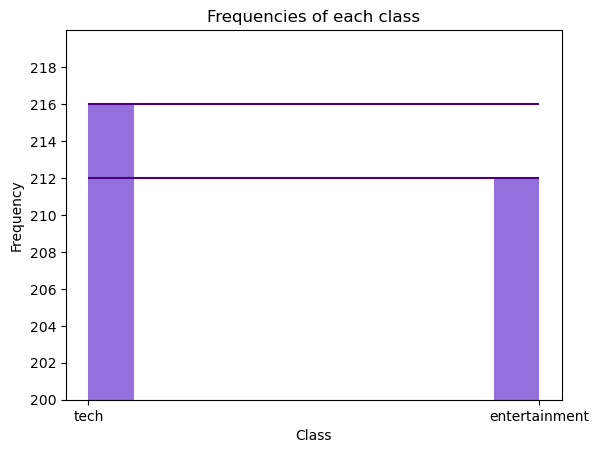

In [5]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print("Number of tech articles:", np.count_nonzero(y[y == "tech"]), "\nNumber of entertainment articles:", np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()


In [6]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()

#print(f"{test_df} \n {test_y} \n {test_X}") # Debug

# Task 2: Classification Models Learning
## Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [7]:
#Code for 2A Naieve Bayes


from sklearn.naive_bayes import MultinomialNB


#X = whole_matrix
y = train_df['Category'] 
nb_classifier = MultinomialNB()
nb_classifier.fit(X, y)
#Extracting the log probabilities and convert them to regular probabilities
log_probs = nb_classifier.feature_log_prob_
probs = np.exp(log_probs)
words_entertainment = np.argsort(probs[0])[::-1][:20]
words_tech = np.argsort(probs[1])[::-1][:20]

print("Top 20 words for entertaiment:")
print(whole_word_bank[words_entertainment])

print("\nTop 20 words for tech:")
print(whole_word_bank[words_tech])


Top 20 words for entertaiment:
['said' 'film' 'best' 'year' 'music' 'also' 'us' 'new' 'one' 'show'
 'first' 'awards' 'tv' 'last' 'uk' 'actor' 'number' 'band' 'mr' 'star']

Top 20 words for tech:
['said' 'people' 'new' 'mobile' 'mr' 'one' 'also' 'would' 'could'
 'technology' 'use' 'users' 'net' 'software' 'games' 'us' 'music' 'many'
 'year' 'phone']


#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [ ]:
#Creating the ratio
ratio_entertainment = probs[0] / (probs[1])
top_20_ratio_idx_0 = np.argsort(ratio_entertainment)[::-1][:20]

print("Top 20 discriminative words for entertainment:")
print(whole_word_bank[top_20_ratio_idx_0])
ratio_tech = probs[1] / (probs[0])
top_20_ratio_idx_1 = np.argsort(ratio_tech)[::-1][:20]

print("Top 20 discriminative words for tech:")
print(whole_word_bank[top_20_ratio_idx_1])

Top 20 discriminative words for entertainment:
['actress' 'singer' 'oscar' 'stars' 'aviator' 'band' 'nominated' 'rock'
 'festival' 'album' 'nominations' 'charles' 'chart' 'foxx' 'oscars'
 'starring' 'singles' 'jamie' 'swank' 'comedy']
Top 20 discriminative words for tech:
['users' 'software' 'microsoft' 'mobile' 'broadband' 'virus' 'firms' 'pc'
 'spam' 'phones' 'gadget' 'net' 'consumer' 'mobiles' 'machines' 'gadgets'
 'windows' 'technologies' 'systems' 'pcs']


#### Which list of words describe the two classes better?
The second list of words describes the two classes better. This is because they are not common words such as "said", or "new". These two words both appear in the top 20 words for entertainment and tech, and so are pointless to look at to determine which article are from which category. The second list of words contains category specific words, we are directly comparing the probability that given the appearance of a word, we are reading a tech article or not. These words are more representative of a certain class as they are disproportionately associated with one class over another.


## Task 2 B
K-Nearest Neighbours Classifier
Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

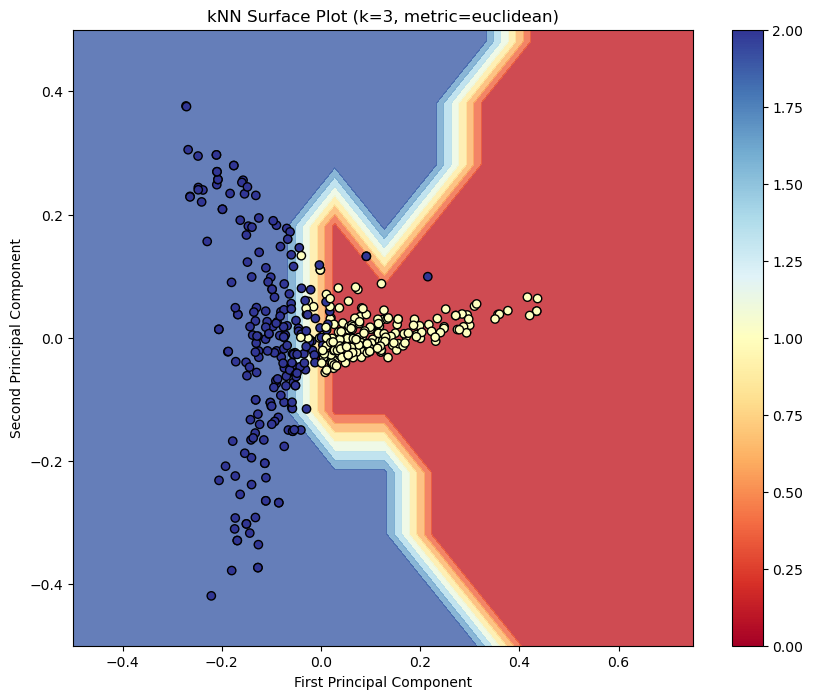

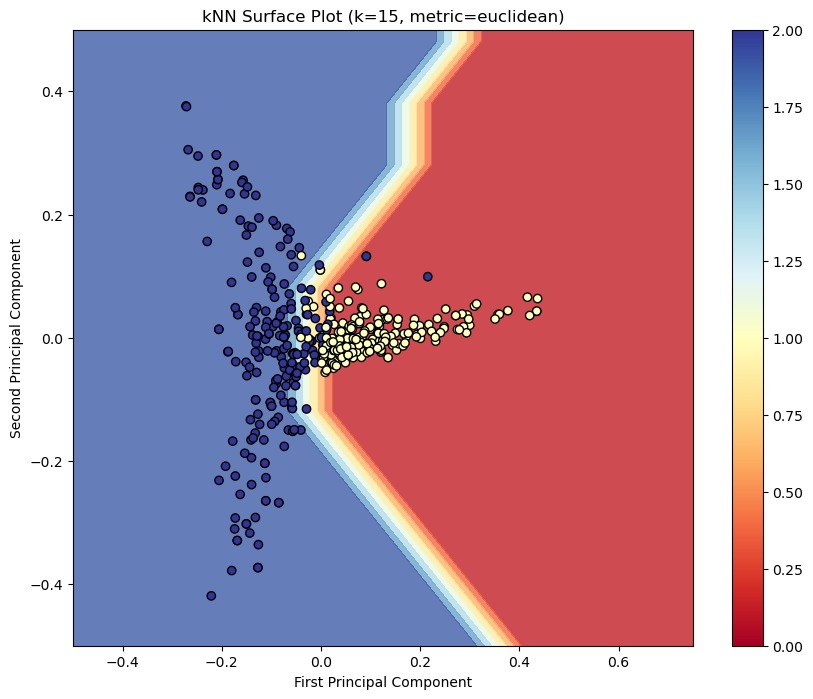

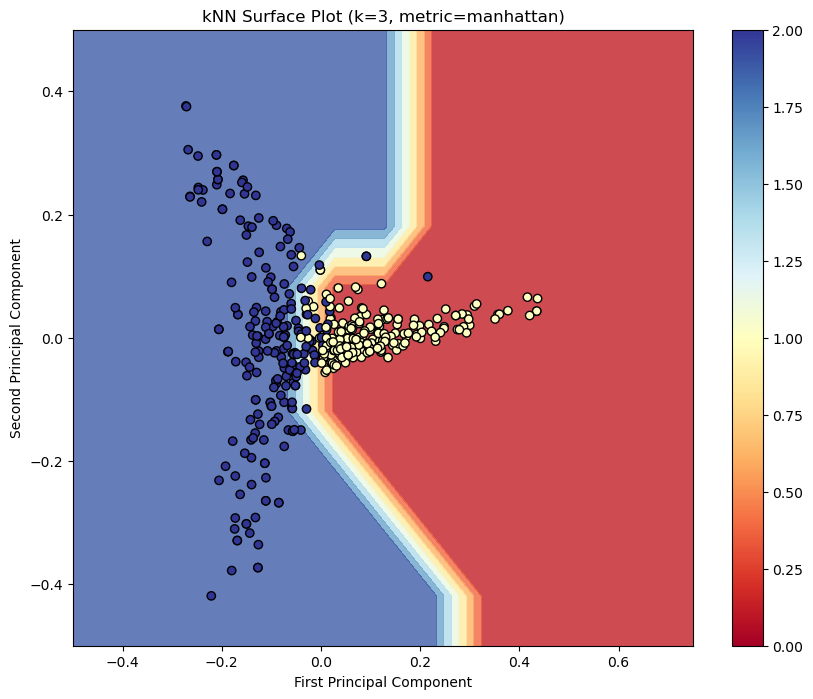

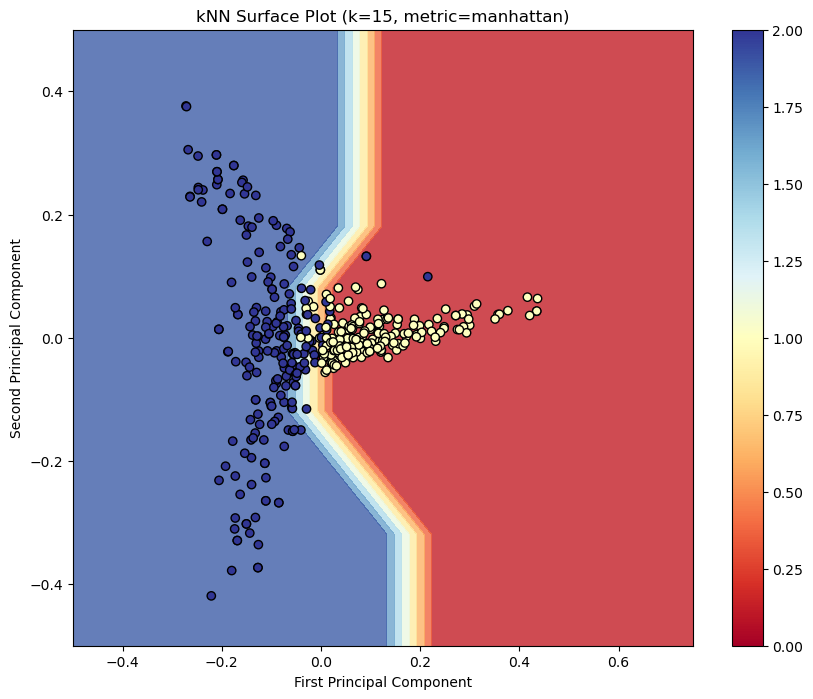

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# load data
train_dff = pd.read_csv('train.csv', header=None, names=['id', 'text', 'label'])
test_dff = pd.read_csv('test.csv', header=None, names=['id', 'text', 'label'])

# vectorize text using TF-IDF 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_dff['text'])
X_test = vectorizer.transform(test_dff['text'])

y_train = train_dff['label']
y_test = test_dff['label']

# train kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict and evaluate 
y_pred = knn.predict(X_test)

#print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

#print("\nClassification Report:")
#print(classification_report(y_test, y_pred, zero_division=0))


# Convert to dense and apply PCA for 2D visualization
X_train_dense = X_train.toarray()
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_dense)

# Convert string labels to numeric for plotting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Function to create surface plot
def create_surface_plot(X_2d, y_numeric, k_val, distance_metric):
    knn_2d = KNeighborsClassifier(n_neighbors=k_val, metric=distance_metric)
    knn_2d.fit(X_2d, y_numeric)
    
    # Create mesh for decision boundary
    h = 0.1
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_numeric, cmap='RdYlBu', edgecolors='black')
    plt.colorbar()
    plt.title(f'kNN Surface Plot (k={k_val}, metric={distance_metric})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.5)
    plt.show()

# Create surface plots with different hyperparameters
create_surface_plot(X_train_2d, y_train_numeric, 3, 'euclidean')  # Small k
create_surface_plot(X_train_2d, y_train_numeric, 15, 'euclidean') # Large k
create_surface_plot(X_train_2d, y_train_numeric, 3, 'manhattan')  # Different metric
create_surface_plot(X_train_2d, y_train_numeric, 15, 'manhattan')  # Different metric

### Explain the impact of k and the distance metric on the decision boundary.

Perhaps the most significant factor is the distance metric. Euclidean distance uses the straight line distance between two points on a plane. So the distance is calculated using d = sqrt((x1 - x2)^2 + (y1 - y2)^2), whereas Manhattan distance is the distance going along our two axis, i.e., d = |x1 - x2| + |y1 - y2|. Because of this, we see our decision boundary is much straighter, it likes to cut inline with our axis.

The k value determines the number of neighbours to consider. With a low k value, our plot will appear more jagged (overfitting to our data) as it only considers the closest data point to a given coordinate. With a high k value, we consider multiple neighbours, and so we will get misclassifications. 

## Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

## Soft-margin SVM Model

In [10]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Use SKLearn to fit our data into a linear SVM model
cValue = 2.45
soft_linear = svm.SVC(kernel="linear", C=cValue)
soft_linear.fit(X, y)

## Test Accuracy with test.csv:
# Using the test data we have (test_df) to see how the model predicts based on C value.
test_pred = soft_linear.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_pred, normalize=True)
print(f"Accuracy for soft margin SVM at C-Penalty={cValue}: {accuracy*100:.2f}%\n")



Accuracy for soft margin SVM at C-Penalty=2.45: 100.00%



## PCA-Reduced Soft-margin SVM Model

Accuracy for PCA-reduced SVM at C-Penalty=2.45: 92.45%



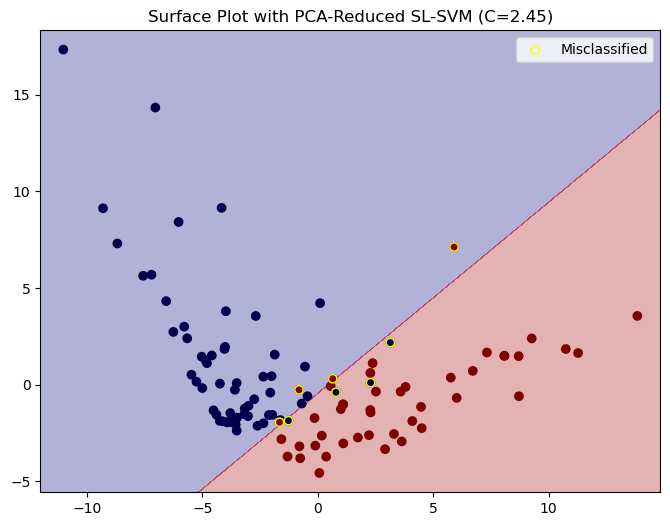

In [11]:
## Create a surface plot for our SVM using Principal Component Analysis :
# Use PCA to reduce the dimensionality of our test,training-data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_X_pca = pca.transform(test_X)

# encode the pred and test labels for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)
test_y_encoded = le.transform(test_y)

# Retrain our SVM on PCA-reduced data
sl_pca = svm.SVC(kernel="linear", C=cValue)
sl_pca.fit(X_pca, y_encoded)
# Prediction + Accuracy to show that PCA reduces SVM accuracy
pred = sl_pca.predict(test_X_pca)
acc = metrics.accuracy_score(test_y_encoded, pred, normalize=True)
print(f"Accuracy for PCA-reduced SVM at C-Penalty={cValue}: {acc*100:.2f}%\n")
color_assignment = test_y_encoded  # 'entertainment' → 0, 'tech' → 1

# mesh grid to plot decision regions/boundary
x = test_X_pca[:, 0]
y = test_X_pca[:, 1]

x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predict on the mesh grid to get decision regions
Z = sl_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions and data points
misclassified = (pred != test_y_encoded) # identify misclassified points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='seismic')  # Decision boundary/region
plt.scatter(test_X_pca[:, 0], test_X_pca[:, 1], c=color_assignment, cmap='seismic')
plt.scatter(test_X_pca[misclassified, 0], test_X_pca[misclassified, 1], edgecolors='yellow', facecolors='none', label='Misclassified')
plt.legend()
plt.title(f'Surface Plot with PCA-Reduced SL-SVM (C={cValue})')
plt.show()

### PCA Dimensionality Reduction
We are using PCA from `scikitlearn.decomposition` to reduce the dimensionality of our data. After reducing the dimensionality of the dataset - we are retraining an SVM based on that as a PCA-reduced model and plotting the results on a surface plot. 
This is done to ensure we have an accurate representation of the soft margin decision boundary (*the only downside would be the reduced accuracy on a PCA-reduced dataset*).

### Impact of $C$ on Soft-margin Linear SVM
The use of hyperparameter $C$ on SVM is to control the hyperplane decision boundary of our model.
The soft-margin linear SVM is essentialy the same as the hard-margin SVM but with a lower penalty value $C$ that allows for some misclassification (hence, soft margin).

The difference with having **lower $C$ values** is it creates larger margins on our decision boundary - having the potential to increase our overall accuracy% for the model on noisy, overlapping, and messy data. This is good for large datasets with more generalised information i.e. similar features to each label class.
However assigning a **value $C$ that is too low** runs the risk of **underfitting**, (our *margin gets too larger*, the model is more lenient on errors).

With **higher $C$-penalty** the margin for misclassification gets narrower. We can observe this in our model getting a "lower" accuracy for our test articles due to high penalisation. This leads to worse accuracy performance on unseen test data, since our model is trying too hard to strictly classify datapoints, including noise.
We have to consider whether $C$ is **too high**: we have the risk of **overfitting** (*margin is narrower*, more strict on noisy data and errors).

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter

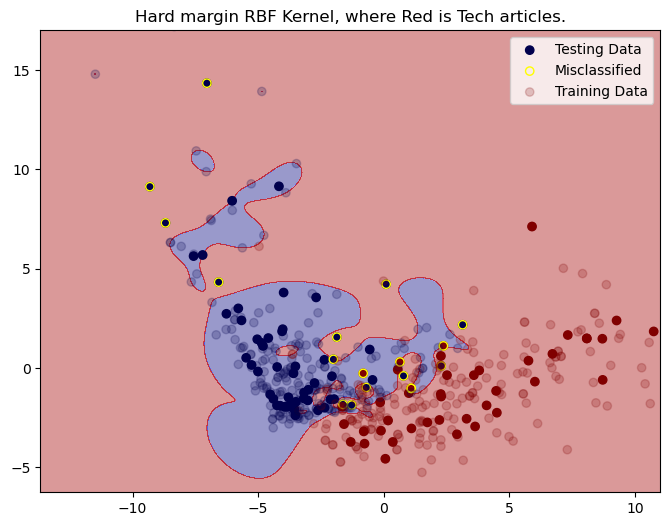

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Do PCA so we only have two dimensions
#print("Making pca") # Debug
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_x_pca = pca.transform(test_X)

# Convert our y vector to binary (tech, entertainment) --> (1,0)
#print("Label encoder") # Debug
#le = LabelEncoder()
#y_encoded = le.fit_transform(y)
#test_y_encoded = le.transform(test_y)               #entertainment 0, tech 1

# Now we fit our pca points to an rbf kernel model
#print("Fitting train") # Debug
rbf_pca = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf_pca.fit(X_pca, y_encoded)

# Now predict our values
#print("Predicting") # Debug
pred = rbf_pca.predict(test_x_pca)
color_assignment = test_y_encoded


# Split x and y values to plot our data points
#print("Splitting into x, y")
x = test_x_pca[:, 0]
y = test_x_pca[:, 1]
x = X_pca[:, 0]
y = X_pca[:, 1]

# Create the mesh, this allows for our contour to show the regions/boundaries for tech and entertainment.
#print("Determining grid") # Debug
x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict to determine the regions and boundaries.
#print("Predicting grid") # Debug
Z = rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Allows for highlighting of misclassified points.
#print("Getting misclassified") # Debug
misclassified = (pred != test_y_encoded)

# Plot the hard margin RBF kernel
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='seismic')  # Decision boundary/region
#print(test_x_pca[0,0], test_x_pca[0, 1], color_assignment[0]) # Debug
plt.scatter(test_x_pca[:, 0], test_x_pca[:, 1], c=color_assignment, cmap='seismic', label="Testing Data")     #Blue is Entertainment, Tech is 1
plt.scatter(test_x_pca[misclassified, 0], test_x_pca[misclassified, 1], edgecolors='yellow', facecolors='none', label='Misclassified')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='seismic', alpha=0.2, label="Training Data")
plt.legend()
plt.title("Hard margin RBF Kernel, where Red is Tech articles.")
plt.xlim(x_min, 11)
plt.ylim(y_min, 17)
plt.show()

### Dimensionality Reduction
For dimensionality reduction for the hard margin svm we used the same PCA class from scikitlearn.decomposition that was used for the soft margin linear svm. We used the same method of retraining an SVM based on this class as a PCA reduced model and then used this for the surface plot above. This way we can try to demonstrate the decision boundaries.

### C value
Our chosen C value is 10 Billion. We chose this as having such a extremely high misclassification penalty makes the SVM a hard margin by weighting the classification error significantly more in our lagrange optimiser for the SVM. This means the svm will not accept misclassifications in the training data. 

### Gamma and kernel width
We use the gamma parameter of the sklearn SVC class to control the kernel width of our model. Gamme is inversely proportional to kernel width meaning a large gamme value corresponds to a small kernel width and a small gamma value corresponds to a large kernel width. Specifically gamma = 1 / (2 x kernel width^2).
Kernel width is an important hyperparameter to consider for our SVM as it defines the 'radius' of a single training data. If we have a high kernel width each data point influences a larger region and we will get smoother decision boundaries. If we have a small kernel width our decision boundaries are more like the k nearest neighbours classifier, the model is much more sensntive to individual data points.
Our gamma hyperparameter is set to auto, which is 1 / number of features, so for our dataset since we have a feature for each unique word encountered, the number of features is quite large and this our gamme value is quite small. Since our gamma value is small we get a high kernel width. High kernel width means a wider kernel, which results in smoother decision boundaries. Having a higher kernel width and a wider kernel is ideal for our case as our input data is high dimensional. With a smaller kernel width the model is more sensitive to individual data points, this can be a problem for our context as we will have many features for words that may not be relevant in our classification. A larger kernel width allows our svm to generalise better as each data point influences larger regions, which is ideal as we do not want to be too sensitive to some irrelevant features.

### Task 2 D
#### Neural Network
#### add more details later

In [ ]:
# code for task 2 D neural network

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("train.csv")
X_text = df['Text']
y = df['Category']

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text).toarray()
X = torch.tensor(X, dtype=torch.float32)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)  # Converts to 0 and 1
y = torch.tensor(y, dtype=torch.long)

# Dataset and DataLoader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_units)
        self.output = nn.Linear(hidden_units, 2)  # Two classes

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)
        return x

# Training function
def train_model(hidden_units, input_size):
    model = SimpleNN(input_size, hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    total_loss = 0.0
    model.train()
    for epoch in range(100):
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        total_loss += epoch_loss / len(dataloader)

    avg_loss = total_loss / 100
    return avg_loss

# Run experiments
input_size = X.shape[1]
hidden_units_list = [5, 20, 40]
losses = []

for hidden_units in hidden_units_list:
    avg_loss = train_model(hidden_units, input_size)
    losses.append(avg_loss)
    print(f"Hidden units: {hidden_units}, Average Training Loss: {avg_loss:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(hidden_units_list, losses, marker='o')
plt.title("Effect of Hidden Units on Training Loss")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Average Training Loss")
plt.grid(True)
plt.show()






ModuleNotFoundError: No module named 'torch'

### Explain the effect of the number of hidden units

We can see that with 5 hidden units, there are too few hidden units, which results in underfitting due to the model not having enough neurons. With 20, there is a good moderate amount of hidden units so it is at a good spot. We can appropriately classify our data set. With 40 however, there is risks of overfitting and does not significantly decrease training loss. However, in this case, when rerunning the test mutiple times, I have discovered that sometimes the training loss increases when going from 5 to 20 hidden units. This might be caused by the narrow range in the initialization being 0.1.

## Task 3: Classification Quality Evaluation
### Hard margin RBF kernel SVM
#### Task 3 A
#### i) Plot for training accuracy as F1 measure (y axis) for each m value (x axis)
#### ii) Plot for testing accuracy as F1 measure (y axis) for each m value (x axis)

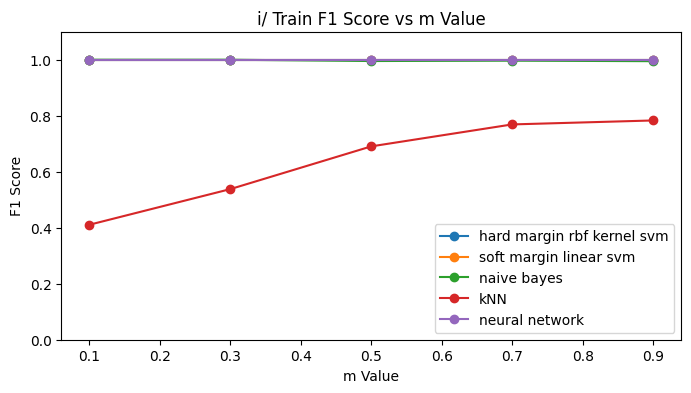

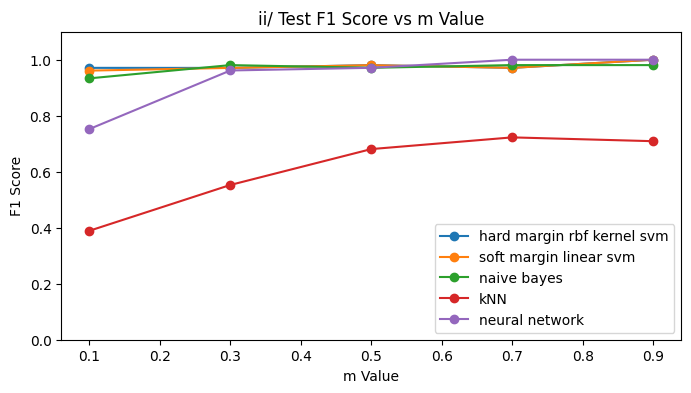

In [ ]:
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

y = train_df["Category"].to_numpy()
m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
train_f1_scores = {"hard margin rbf kernel svm": [], "soft margin linear svm": [],
                   "naive bayes": [], "kNN": [], "neural network": []}
test_f1_scores = {"hard margin rbf kernel svm": [], "soft margin linear svm": [],
                  "naive bayes": [], "kNN": [], "neural network": []}
for m in m_values:
    # get training data sub set
    rows = int(m * y.size)
    y_subset = y[0: rows]
    X_subset, whole_word_bank, whole_frequencies, cv_subset = extract_features(train_df['Text'][0:rows])

    # train each model
    # hard margin rbf svm
    rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
    rbf.fit(X_subset, y_subset)

    # soft margin linear svm
    soft_linear = SVC(kernel="linear", C=cValue)
    soft_linear.fit(X_subset, y_subset)

    # naive bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_subset, y_subset)

    # kNN
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_subset, y_subset)

    # neural network
    nn = MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.01, max_iter=100,
                       activation='relu', solver='adam', random_state=42)
    nn.fit(X_subset, y_subset)
    
    # get training accuracy as f1-measure
    # hard margin rbf svm
    y_pred = rbf.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["hard margin rbf kernel svm"].append(train_f1)

    # soft margin linear svm
    y_pred = soft_linear.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["soft margin linear svm"].append(train_f1)

    # naive bayes
    y_pred = nb_classifier.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["naive bayes"].append(train_f1)

    # kNN
    y_pred = knn.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["kNN"].append(train_f1)

    # neural network
    y_pred = nn.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["neural network"].append(train_f1)

    # get testing accuracy as f1-measure
    test_X = cv_subset.transform(test_df['Text']).toarray() # use vectoriser from training to transform test data
    # hard margin rbf svm
    y_pred = rbf.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["hard margin rbf kernel svm"].append(test_f1)

    # soft margin linear svm
    y_pred = soft_linear.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["soft margin linear svm"].append(test_f1)

    # naive bayes
    y_pred = nb_classifier.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["naive bayes"].append(test_f1)

    # kNN
    y_pred = knn.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["kNN"].append(test_f1) 

    # neural network
    y_pred = nn.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["neural network"].append(test_f1)


# plot for 3ai: training accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
for model_name, scores in train_f1_scores.items():
    plt.plot(m_values, scores, marker='o', label=model_name)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('i/ Train F1 Score vs m Value')
plt.legend()
plt.show()

# plot for 3aii: test accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
for model_name, scores in test_f1_scores.items():
    plt.plot(m_values, scores, marker='o', label=model_name)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('ii/ Test F1 Score vs m Value')
plt.legend()
plt.show()




#### Task 3 B
#### 5-fold cross validation to assess model performance

In [ ]:
from sklearn.model_selection import cross_val_score

# Naive Bayes
alphas = [0.1, 0.5, 1, 5, 10]
print("Naive Bayes")
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    scores = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
    print(f"Alpha: {alpha}, CV Accuracy; {scores.mean():.3f}")
print()

# kNN
n_values = [1, 3, 5, 10, 15]
print("kNN")
for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    print(f"Number of neighbours: {n}, CV Accuracy; {scores.mean():.3f}")
print()

# Hard Margin SVM
gamma_values = [0.0001, 0.001, 0.01, 0.1]
print("Hard margin rbf kernel SVM")
for gamma in gamma_values:
    rbf = SVC(kernel='rbf', C=1e10, gamma=gamma)
    scores = cross_val_score(rbf, X, y, cv=5, scoring='accuracy')
    print(f"gamma: {gamma}, CV Accuracy; {scores.mean():.3f}")
print()

# Soft Margin Linear SVM
C_values = [0.00001, 0.001, 0.1, 1, 10]
print("Soft margin linear kernel SVM")
for C_val in C_values:
    soft_linear = SVC(kernel='linear', C=C_val)
    scores = cross_val_score(soft_linear, X, y, cv=5, scoring='accuracy')
    print(f"C: {C_val}, CV Accuracy; {scores.mean():.3f}")
print()

# Neural Netork
hidden_layer_sizes = [(10,), (20,), (50,), (100,)]
print("Neural network")
for size in hidden_layer_sizes:
    nn = MLPClassifier(hidden_layer_sizes=size, learning_rate_init=0.01, max_iter=100,
                       activation='relu', solver='adam', random_state=42)
    scores = cross_val_score(nn, X, y, cv=5, scoring='accuracy')
    print(f"Hidden layer size: {size}, CV Accuracy; {scores.mean():.3f}")
    

Naive Bayes
Alpha: 0.1, CV Accuracy; 0.986
Alpha: 0.5, CV Accuracy; 0.984
Alpha: 1, CV Accuracy; 0.981
Alpha: 5, CV Accuracy; 0.972
Alpha: 10, CV Accuracy; 0.956

kNN
Number of neighbours: 1, CV Accuracy; 0.832
Number of neighbours: 3, CV Accuracy; 0.741
Number of neighbours: 5, CV Accuracy; 0.720
Number of neighbours: 10, CV Accuracy; 0.582
Number of neighbours: 15, CV Accuracy; 0.568

Hard margin rbf kernel SVM
gamma: 0.0001, CV Accuracy; 0.972
gamma: 0.001, CV Accuracy; 0.970
gamma: 0.01, CV Accuracy; 0.806


#### Naive Bayes
For the naive bayes classifier the hyper parameter we experimeneted with was alpha. Alpha is the laplace smoothing paramater. Laplace smoothing prevents conditional probabilities from being 0 (getting 0 zero division errors), and alpha is the value that determines how largely the laplace smoothing affects the conditional probability. 
Based on the results from the 5 fold cross validation the best value for alpha is 0.1, which is the smallest tested value, this gave an average 5 fold cross validation accuracy of 98.6%. A smaller alpha is better because we do not want the laplace smoothing to flatten the distribution too much, we only want to use it to handle zero frequency scenarios.  When we increase alpha we flatten the distribution more and the conditional probabilities of words are pushed closer to the uniform, distinctions between the word frequencies become blurred. So a lower value like 0.1 for the alpha hyper parameter is best for naive bayes.

#### k-nearest neighbours


#### Hard margin rbf kernel SVM
As explained in the discussion for 2c, the gamma hyperparameter is inversely proportional to kernel width, so by controlling gamme we are mainly controlling kernel width. As shown in the 5 fold cross validation results, as we increase gamma the cross validation accuracy drops. The best accuracy is when we have a very small gamma like 0.0001 and 0.001. When we used gamma='auto' in 2c, this set gamma to 1/number of features which is close to 0.0001. A small gamma value is associated with a higher kernel width which means that we get smoother decision boundaries and our classifier is less sensitive to individual data points and better at generalising as each data point influences larger regions. The better generalisation that comes from having a higher kernel width can be seen with the high accuracy for gamma values 0.0001 and 0.001. We can see that when gamma is larger than that we start to overfit and get lower accuracies.

#### Soft margin linear SVM
For the soft margin linear SVM we experimented with the C hyperparameter. Based on the results from 5 fold cross validation we can see that a lower C value (0.001) gives a lower accuracy than higher C values. C is the regularisation parameter, and determines the weighting of classification error when building the SVM. A smaller C means the SVM tolerates more misclassifications and the margin is wider, while a larger C means the SVM tries to classify all training data correctly even if it results in a very narrow margin. This is not a hyperparameter considered for the hard margin rbf kernel SVM, as the whole point of a hard margin SVM is that C is extremely large to tolerate zero training data misclassifications. Lower C values giving a a lower accuracy makes sense, as this means the model may allow too many misclassifications of the training data when building its margins, resulting in underfitting. We can get a very simple boundary that does not capture the patterns across the data well, resulting in worse generalisation and worse predictions as reflected in the lower accuracy. We can see that ideally a larger C value is better like 0.1 or 1.


#### Neural Network
For the neural network there are many hyperparameters to experiment with but we decided to test the hidden layer size (number of units in the hidden layer). We tested 10, 20, 50 and 100. Based on the results of the cross validation the best values were 20 and 50. This makes sense as only 10 units is low. A low number of hidden units means we can underfit more to the training data, and we may not be able to actually capture patterns as well, however the difference in accuracy is quite small and still 96.3%. With 100 hidden units we get 94.9%, this makes sense as 100 units is too many, and we can overfit slightly to the training data. The sweet spot seems to be between 10 and 100, with 20 and 50 hidden units achieving 96.7% accuracy.